In [404]:
import numpy as np
import math

In [405]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [406]:
def train(X_in, Y):

    """
    Input :

    Ouput :

    """
    n = X_in.shape[1] + 1
    m = X_in.shape[0]
    
    np.set_printoptions(precision=3,suppress=True)
    
    X = np.ones((m,n))
    mean = np.zeros(m)
    std = np.zeros(m)
    for i in range(n-1):
        mean[i] = X_in[:,i].mean()
        std[i]  = np.std(X_in[:,i])
        X[:,i] = (X_in[:,i] - mean[i])/std[i]

    X_T = np.transpose(X)
    theta = np.zeros(n)
#     print(X,X_T)
    
#     theta_(t+1) = theta_(t) - inv(H)*grad(LL(theta_t))

#     grad(LL(theta_t)) = X_T * (y - g(X*theta_t))
#     let pi(i) = g(x(i)_T * theta_t)
#     W = diag(pi(i) * (1-pi(i)))
#     H = - X_T * W * X
    
    iter = 0
    sig = 0
    while(True):
        iter+=1
        sig = sigmoid(np.matmul(X,theta))
        W = np.diag(np.multiply(sig, 1-sig))
        grad_LL = np.matmul(X_T, Y-sig)
        H = -np.matmul(X_T, np.matmul(W, X))
        change_amt = -np.matmul(np.linalg.inv(H), grad_LL)
        
        theta = theta + change_amt
        
        max_change = abs(max(change_amt, key=abs))
        
        if(max_change < 1e-8):
            break;

    print(iter)
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = 0 if sig[i] < 0.5 else 1
    
#     from mpl_toolkits.mplot3d import Axes3D
#     import matplotlib.pyplot as plt 
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     fg = np.zeros(m)
#     ax.scatter(X[:,0],X[:,1],fg,c=y_pred)
#     plt.show()

    theta_req = np.zeros(n)
    theta_req[0] = theta[0] / std[0]
    theta_req[1] = theta[1] / std[1]
    theta_req[2] = theta[2] - (theta[0]*mean[0])/std[0] - (theta[1]*mean[1])/std[1]
    
    import matplotlib.pyplot as plt
    
#     ((X1_boundary-mean[1])/std[1])*theta[1] + ((X_in[:,0] - mean[0])/std[0])*theta[0] + theta[2] = 0;
#     X1_boundary = mean[1] + (((-((X_in[:,0] - mean[0])/std[0])*theta[0] - theta[2]) * std[1]) / theta[1])
    X1_boundary = (-(theta_req[0]/theta_req[1]) * X_in[:,0]) - (theta_req[2] / theta_req[1])
    
    
    plt.scatter(X_in[:,0],X_in[:,1],c=y_in)
    plt.plot(X_in[:,0],X1_boundary,color='red')
    
    return y_pred

(3,)
8


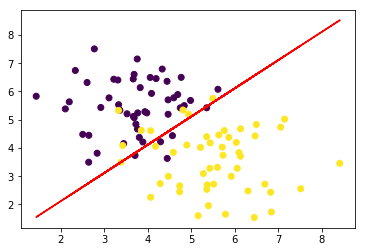

In [407]:
x_in = np.genfromtxt('../ass1_data/logisticX.csv',delimiter=',')
y_in = np.genfromtxt('../ass1_data/logisticY.csv',delimiter=',')

# print(x_in.shape, y_in.shape)
# train(x_in, y_in)
y_pred = train(x_in, y_in)

# print(y_pred,y_in)
# for i in range(x_in.size):
#     print(x_in[i],y_pred[i],y_in[i])

# import matplotlib.pyplot as plt
# plt.plot(x_in,y_in,'ro',color='blue')
# plt.plot(x_in,y_pred,'ro',color='red')
# # plt.scatter(x,y,color='red')
# # plt.scatter(x,y1,color='blue')
# plt.show()